In [1]:
import numpy as np
import pandas as pd

import os

import tensorflow as tf

from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, SpatialDropout2D, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
train = pd.read_csv("D:/Academics Canada/AIDI/Semester 2/Capstone 2/Project/MNIST Dataset/sign_mnist_train.csv")
test = pd.read_csv("D:/Academics Canada/AIDI/Semester 2/Capstone 2/Project/MNIST Dataset/sign_mnist_test.csv")

In [3]:
label = train['label'].values

In [4]:
import numpy as np
unique_value = np.array(label)
np.unique(unique_value)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [5]:
train.drop('label', axis = 1, inplace = True)

In [6]:
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [7]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
label = label_binarizer.fit_transform(label)

In [8]:
label

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

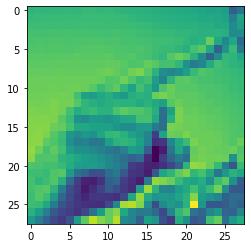

In [9]:
import matplotlib.pyplot as plt
plt.imshow(images[1].reshape(28,28))

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, label, test_size = 0.3, random_state = 101)

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [12]:
batch_size = 128
num_classes = 24
epochs = 50

In [13]:
x_train = x_train / 255
x_test = x_test / 255

In [14]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

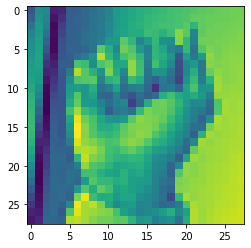

In [46]:
plt.imshow(x_train[0].reshape(28, 28))

In [16]:
import os
# Directory where the checkpoints will be saved
checkpoint_dir = 'D:/Academics Canada/AIDI/Semester 2/Capstone 2/Model_CNN'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "mnist_chkpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

In [17]:
model = Sequential()

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation = 'softmax'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)               

In [19]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adam(), metrics = ['accuracy'])

In [20]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = epochs, 
                    batch_size = batch_size)

Train on 19218 samples, validate on 8237 samples
Epoch 1/50
19218/19218 [==============================] - 17s 882us/step - loss: 2.6750 - accuracy: 0.1805 - val_loss: 1.7839 - val_accuracy: 0.4449
Epoch 2/50
19218/19218 [==============================] - 18s 941us/step - loss: 1.4036 - accuracy: 0.5360 - val_loss: 0.9745 - val_accuracy: 0.6837
Epoch 3/50
19218/19218 [==============================] - 17s 909us/step - loss: 0.8444 - accuracy: 0.7177 - val_loss: 0.5678 - val_accuracy: 0.8187
Epoch 4/50
19218/19218 [==============================] - 18s 927us/step - loss: 0.5585 - accuracy: 0.8117 - val_loss: 0.3715 - val_accuracy: 0.8923
Epoch 5/50
19218/19218 [==============================] - 18s 947us/step - loss: 0.4024 - accuracy: 0.8648 - val_loss: 0.2435 - val_accuracy: 0.9341
Epoch 6/50
19218/19218 [==============================] - 18s 939us/step - loss: 0.2737 - accuracy: 0.9127 - val_loss: 0.1803 - val_accuracy: 0.9553
Epoch 7/50
19218/19218 [==============================] -

In [22]:
test_labels = test['label']

In [23]:
test.drop('label', axis = 1, inplace = True)

In [24]:
test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

In [25]:
test_labels = label_binarizer.fit_transform(test_labels)

In [26]:
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [27]:
y_pred = model.predict(test_images)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, y_pred.round())

0.8577802565532627

Predicted alphabet:  a


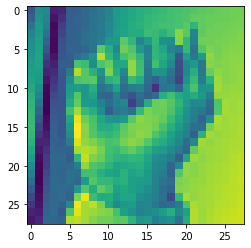

In [47]:
image = 0
image_0  = x_train[image]
image_0 = image_0.reshape((1, 28, 28, 1))
z = model.predict(image_0)
alphabets = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y']
max_index = np.argmax(z[0])
final_label = alphabets[max_index]

print('Predicted alphabet: ', final_label)
plt.imshow(x_train[image].reshape(28, 28))

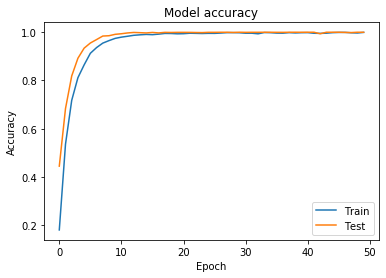

In [33]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

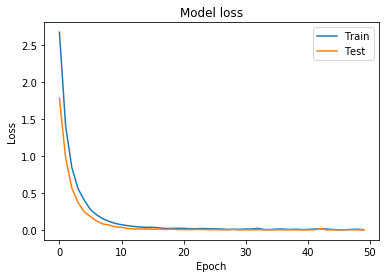

In [32]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()